### regression analysis (Weight (INI21002) ~ GPR151)

In [1]:
library(data.table)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


In [2]:
data_all <- fread(
    'zcat < ../../../private_data/FigS13-15_regression_data.tsv.gz', 
    header=TRUE,
    data.table=FALSE
)

Read 488370 rows and 53 (of 53) columns from 0.189 GB file in 00:00:04


In [3]:
repo_dir <- normalizePath('../../../')
out_dir <- file.path(repo_dir, 'figs', basename(getwd()))

In [4]:
data <- data_all %>% mutate(
    sex_label = ifelse(sex == 0, 'female', 'male'),
    x = GPR151,
    y = INI21002
) %>% filter(
    white_british == TRUE &
    sex != -9 &
    age > 0 & 
    x != -9 &
    y != -9    
)

y_lab <- 'Weight [kg]'
x_lab <- expression(paste("rs114285050 (", italic('GPR151'), ")"))
file_name_head <- 'GPR151_weight'

data %>% dim() %>% print()

[1] 336053     56


#### the following sni are semi-automated

In [5]:
p <- ggplot(
    data, 
    aes(x = as.factor(x), y = y)) +
geom_boxplot(aes(group = factor(x))) +
stat_summary(
    fun.y=mean, colour="darkred", geom="point", 
    shape=18, size=5, show.legend = FALSE) + 
labs(y = y_lab, x = x_lab) 


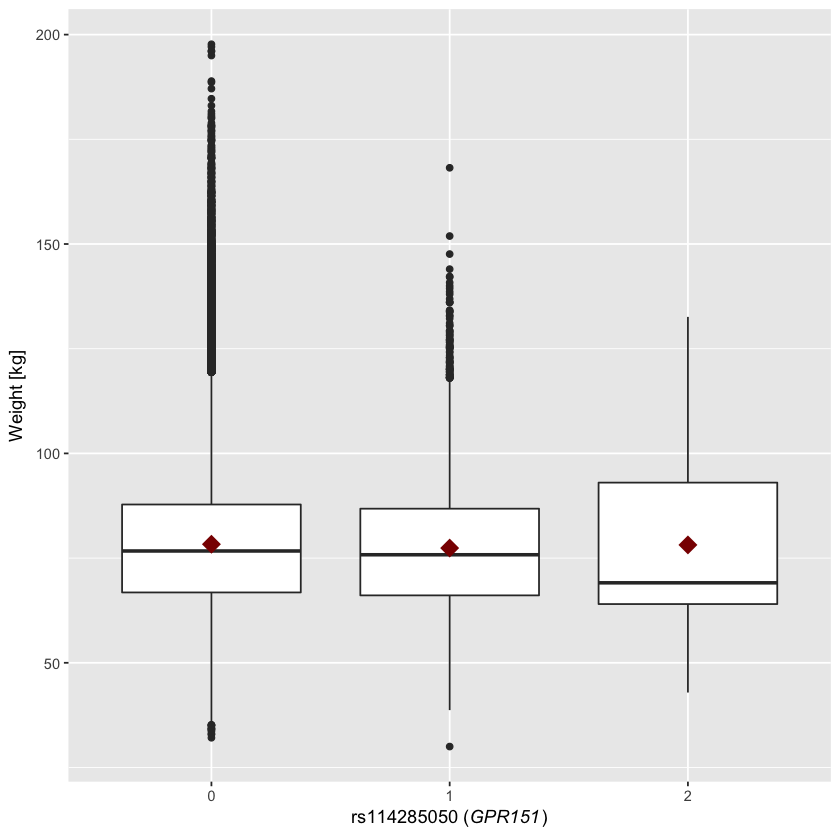

In [6]:
p

Saving 7 x 7 in image


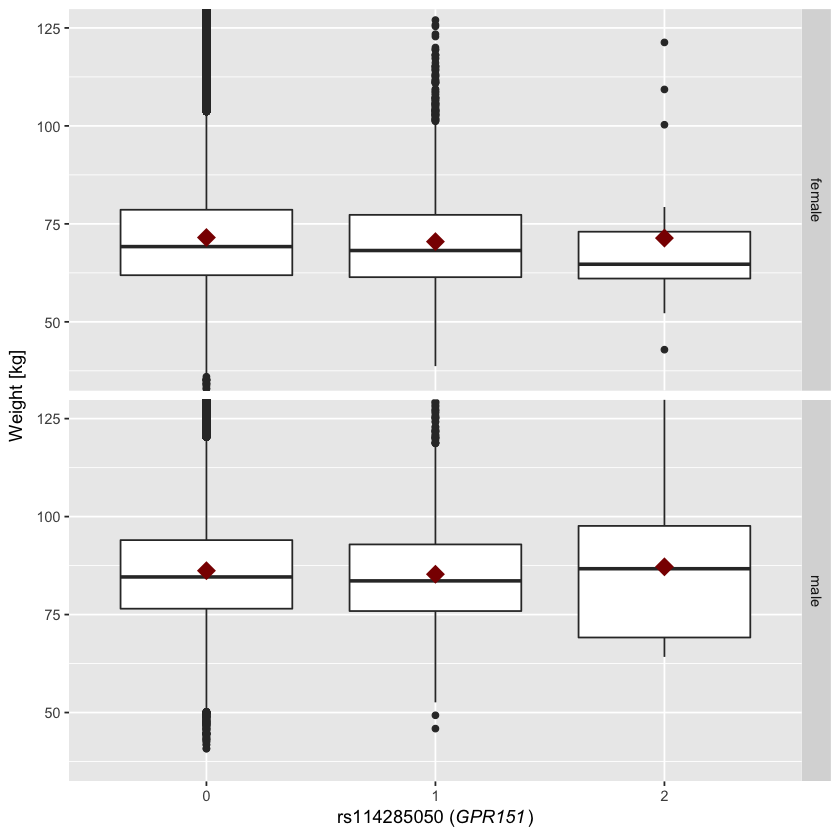

In [7]:
p + 
coord_cartesian(
    ylim = 1.05 * boxplot.stats(data$y)$stats[c(1, 5)]
) + 
facet_grid(sex_label ~ .) + 
ggsave(
    file.path(out_dir, paste0(file_name_head, '.pdf'))
)

Saving 7 x 7 in image


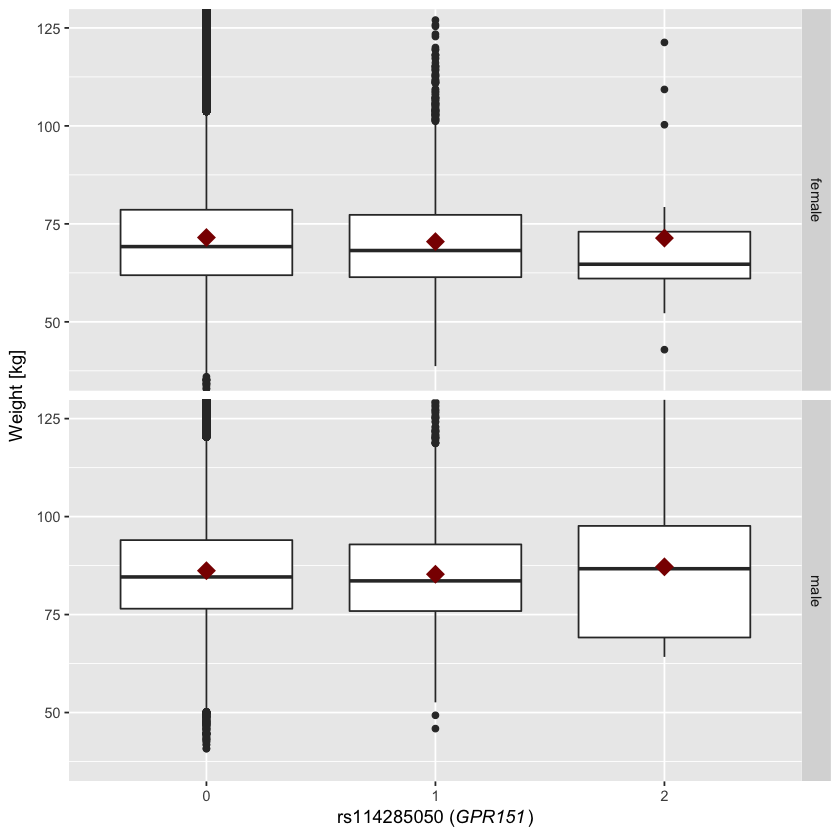

In [8]:
p + 
coord_cartesian(
    ylim = 1.05 * boxplot.stats(data$y)$stats[c(1, 5)]
) + 
facet_grid(sex_label ~ .) + 
ggsave(
    file.path(out_dir, paste0(file_name_head, '_full.pdf'))
)

In [9]:
aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, mean
) %>% print()

aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, median
) %>% print()

aggregate(
    y ~ as.factor(x) + as.factor(sex_label), data, length
) %>% print()


  as.factor(x) as.factor(sex_label)        y
1            0               female 71.51766
2            1               female 70.46968
3            2               female 71.36875
4            0                 male 86.19682
5            1                 male 85.29258
6            2                 male 87.18333
  as.factor(x) as.factor(sex_label)    y
1            0               female 69.2
2            1               female 68.2
3            2               female 64.7
4            0                 male 84.6
5            1                 male 83.6
6            2                 male 86.7
  as.factor(x) as.factor(sex_label)      y
1            0               female 177513
2            1               female   2949
3            2               female     16
4            0                 male 152974
5            1                 male   2589
6            2                 male     12


In [10]:
lm_1 <- lm (
    y ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(x),
    data
)


In [11]:
summary(lm_1)


Call:
lm(formula = y ~ 0 + age + as.factor(sex) + PC1 + PC2 + PC3 + 
    PC4 + as.factor(x), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.073  -9.672  -2.007   7.460 123.513 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
age             -0.075696   0.003032 -24.963  < 2e-16 ***
as.factor(sex)0 76.824136   0.279368 274.992  < 2e-16 ***
as.factor(sex)1 91.540972   0.280712 326.103  < 2e-16 ***
PC1              0.024348   0.015822   1.539    0.124    
PC2             -0.010853   0.016369  -0.663    0.507    
PC3              0.007022   0.015730   0.446    0.655    
PC4              0.008085   0.008674   0.932    0.351    
as.factor(x)1   -0.962230   0.190426  -5.053 4.35e-07 ***
as.factor(x)2    0.238902   2.656009   0.090    0.928    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.05 on 336044 degrees of freedom
Multiple R-squared:  0.9691,	Adjusted R-squared:  0.9691 
F-statistic: 1.169

In [12]:
lm_age2 <- lm (
    y ~ 0 + age + I(age^2) + as.factor(sex) + PC1 + PC2 + PC3 + PC4 + as.factor(x),
    data
)


In [13]:
summary(lm_age2)


Call:
lm(formula = y ~ 0 + age + I(age^2) + as.factor(sex) + PC1 + 
    PC2 + PC3 + PC4 + as.factor(x), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.178  -9.663  -2.011   7.451 123.987 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
age              0.8798487  0.0501327  17.550  < 2e-16 ***
I(age^2)        -0.0074266  0.0003889 -19.095  < 2e-16 ***
as.factor(sex)0 46.5696705  1.6088157  28.947  < 2e-16 ***
as.factor(sex)1 61.3180259  1.6074240  38.147  < 2e-16 ***
PC1              0.0247407  0.0158137   1.565    0.118    
PC2             -0.0112188  0.0163603  -0.686    0.493    
PC3              0.0071886  0.0157216   0.457    0.647    
PC4              0.0091850  0.0086692   1.060    0.289    
as.factor(x)1   -0.9540245  0.1903238  -5.013 5.37e-07 ***
as.factor(x)2    0.1856435  2.6545744   0.070    0.944    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.05 on 336043 degrees of free